In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [20]:
df = pd.read_json('player_details.json')
df = df.rename(columns={'Player_ID': 'Player_id'})
df['Current market value'] = df['Current market value'].replace({'k': 'e3', 'm': 'e6','b': 'e9'}, regex=True)
df['Current market value'] = pd.to_numeric(df['Current market value'], errors='coerce')
df2 = df[['Player_id','Current market value','Position']]
df = df2.dropna()

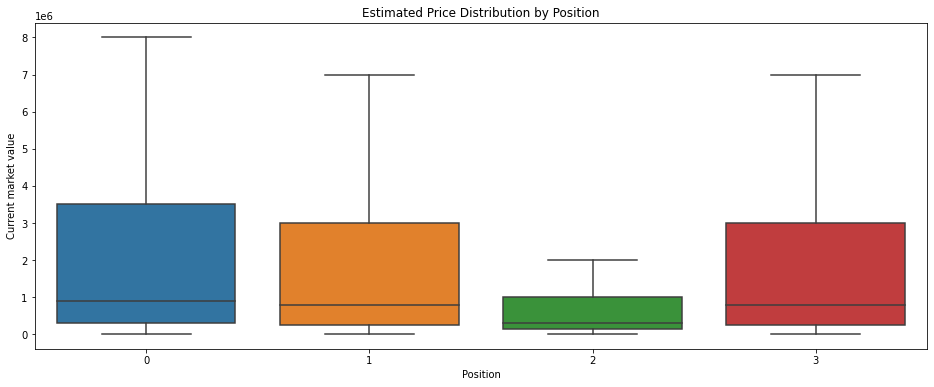

In [19]:

# Group data by position
position_groups = df.groupby('Position')

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(16, 6))

# Create a list to store box plot data
data_for_boxplot = []

# Iterate over position groups and extract market value data
for position, data in position_groups:
    data_for_boxplot.append(data['Current market value'])

# Generate the box plot
sns.boxplot(data=data_for_boxplot, ax=ax, showfliers=False)

# Set plot labels and title
plt.xlabel('Position')
plt.ylabel('Current market value')
plt.title('Estimated Price Distribution by Position')

# Show the plot
plt.show()

# Calculate summary statistics for each position group
summary_stats = position_groups['Current market value'].describe()

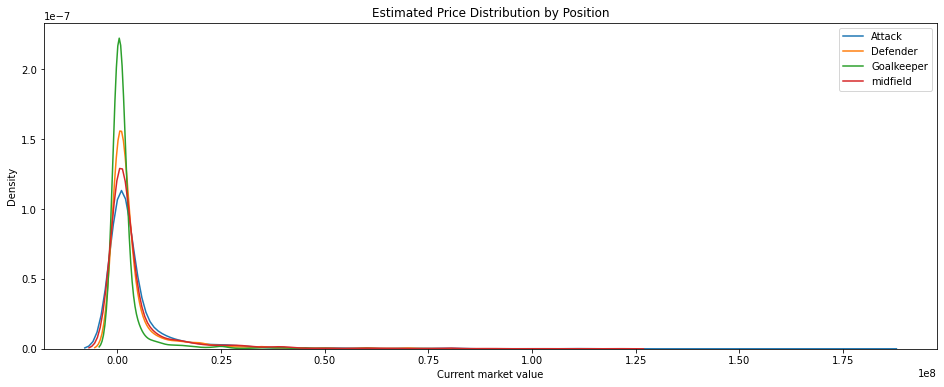

In [17]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(16, 6))

# Iterate over position groups and plot KDE
for position, data in position_groups:
    sns.kdeplot(data=data['Current market value'], ax=ax, label=position)

# Set plot labels and title
plt.xlabel('Current market value')
plt.ylabel('Density')
plt.title('Estimated Price Distribution by Position')

# Display legend
plt.legend()

# Show the plot
plt.show()


In [18]:
# Display summary statistics
print(summary_stats)

             count          mean           std      min       25%       50%  \
Position                                                                      
Attack      2096.0  4.795740e+06  1.214366e+07  10000.0  300000.0  900000.0   
Defender    2442.0  3.848845e+06  8.706618e+06  10000.0  250000.0  800000.0   
Goalkeeper   841.0  1.967342e+06  5.672604e+06  10000.0  150000.0  300000.0   
midfield    2221.0  4.417253e+06  1.069097e+07  10000.0  250000.0  800000.0   

                  75%          max  
Position                            
Attack      3500000.0  180000000.0  
Defender    3000000.0   75000000.0  
Goalkeeper  1000000.0   60000000.0  
midfield    3000000.0  120000000.0  
